# Classification

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
keras.__version__

'3.13.1'

In [52]:
import numpy as np

def read_images(path):
    with open(path, "rb") as f:
        data = np.frombuffer(f.read(), dtype=np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

X_train = read_images("Dataset/fashion-mnist/train-images-idx3-ubyte/train-images-idx3-ubyte")
X_test  = read_images("Dataset/fashion-mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte")


In [53]:
def read_labels(path):
    with open(path, "rb") as f:
        return np.frombuffer(f.read(), dtype=np.uint8, offset=8)

y_train = read_labels("Dataset/fashion-mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte")
y_test  = read_labels("Dataset/fashion-mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte")


In [54]:
X_train.shape

(60000, 28, 28)

In [55]:
X_test.shape

(10000, 28, 28)

In [56]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

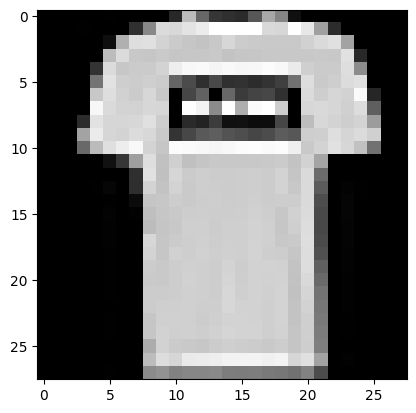

In [57]:
plt.imshow(X_train[1,:],cmap="gray")

In [58]:
X_train,X_test = X_train/255.0,X_test/255.0

In [59]:
X_train[0,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Define Model

In [60]:
# first way

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(100,activation="relu"))
# model.add(keras.layers.Dense(75,activation="relu"))
# model.add(keras.layers.Dense(10,activation="softmax"))

# second way

model = keras.models.Sequential([

keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(100,activation="relu"),
keras.layers.Dense(75,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])


c:\Users\SH.Rayan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [63]:
model.layers[1]

<Dense name=dense_3, built=True>

In [64]:
weight , bias = model.layers[1].get_weights()

In [65]:
weight.shape

(784, 100)

In [66]:
weight

array([[ 0.07905884, -0.07410007, -0.00442313, ..., -0.0467678 ,
        -0.03698971,  0.02335995],
       [ 0.08168797, -0.07842288,  0.05950363, ..., -0.07848884,
        -0.05422488,  0.05188702],
       [ 0.04979967,  0.01570748,  0.05225086, ..., -0.01223812,
         0.07020202, -0.01518138],
       ...,
       [-0.02050433,  0.0486609 , -0.05147389, ...,  0.02906284,
         0.01586994,  0.06975487],
       [ 0.06567343, -0.01775128, -0.02166312, ..., -0.01682788,
         0.00817657, -0.06869496],
       [-0.05507053, -0.00448303, -0.07330244, ...,  0.06225014,
        -0.07411067, -0.07092322]], shape=(784, 100), dtype=float32)

In [67]:
bias.shape

(100,)

In [68]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## Compile Model

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"]
              )

## Fit Model

In [70]:
history = model.fit(X_train,y_train,epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7294 - loss: 0.8302 - val_accuracy: 0.8075 - val_loss: 0.5657
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8179 - loss: 0.5284 - val_accuracy: 0.8304 - val_loss: 0.4889
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8360 - loss: 0.4742 - val_accuracy: 0.8325 - val_loss: 0.4711
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8439 - loss: 0.4463 - val_accuracy: 0.8439 - val_loss: 0.4518
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8520 - loss: 0.4250 - val_accuracy: 0.8549 - val_loss: 0.4269
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8565 - loss: 0.4091 - val_accuracy: 0.8594 - val_loss: 0.4102
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8609 - loss: 0.3957 - val_accuracy: 0.8592 - val_loss: 0.4069
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8643 - loss: 0.3847 - 

In [71]:
print(history.history)

{'accuracy': [0.7294374704360962, 0.8178958296775818, 0.8360000252723694, 0.8438958525657654, 0.8519999980926514, 0.8564791679382324, 0.8609166741371155, 0.8642916679382324, 0.8670833110809326, 0.8716874718666077, 0.8738333582878113, 0.8763333559036255, 0.8790624737739563, 0.8801875114440918, 0.8819375038146973, 0.8836249709129333, 0.886104166507721, 0.8886041641235352, 0.8885833621025085, 0.8914374709129333, 0.8926666378974915, 0.8940208554267883, 0.8962083458900452, 0.8977916836738586, 0.898687481880188, 0.9001250267028809, 0.9003750085830688, 0.9038958549499512, 0.9030208587646484, 0.9053333401679993, 0.9059791564941406, 0.9067500233650208, 0.9072083234786987, 0.9099166393280029, 0.9113541841506958, 0.9124374985694885, 0.9134374856948853, 0.9152291417121887, 0.9149374961853027, 0.9161458611488342, 0.9168333411216736, 0.9175000190734863, 0.918916642665863, 0.9207500219345093, 0.9213333129882812, 0.9219791889190674, 0.922249972820282, 0.9244166612625122, 0.9247499704360962, 0.92547917

In [72]:
history.params

{'verbose': 'auto', 'epochs': 50, 'steps': 1500}

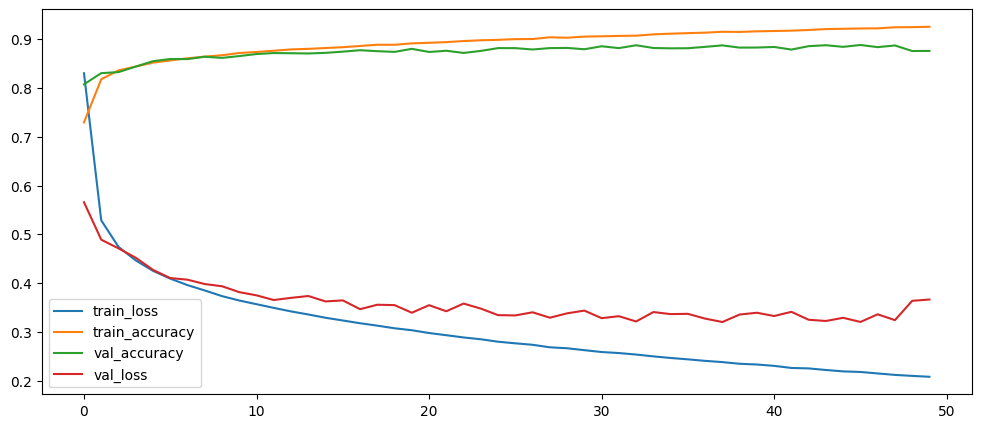

In [74]:
fig,ax = plt.subplots(figsize=(12,5))
ax.plot(history.history["loss"],label='train_loss')
ax.plot(history.history["accuracy"],label='train_accuracy')
ax.plot(history.history["val_accuracy"],label='val_accuracy')
ax.plot(history.history["val_loss"],label='val_loss')
ax.legend()

In [75]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3978


[0.3977710008621216, 0.8680999875068665]

In [77]:
X_test.shape

(10000, 28, 28)

In [78]:
x3 = X_test[1:3,:,:]
x3.shape

(2, 28, 28)

In [80]:
np.argmax(model.predict(x3).round(3),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([2, 1])

In [81]:
y_test[1:3]

array([2, 1], dtype=uint8)